![](nlfff.png)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4
from sunpy.map import Map
from astropy.table import Table

In [2]:
class nlfff:

      def __init__(self,filename):
            self.filename=filename

            nc=netCDF4.Dataset(self.filename,'r')
            self.NOAA=nc.NOAA
            self.year_month_day_time=nc.year_month_day_time
            self.project=nc.project
            self.production_date=nc.production_date
            self.version=nc.version
            self.data_doi=nc.data_doi
            self.http_link=nc.http_link
            self.Distributor=nc.Distributor
            
            nc_x=nc.variables['x']
            self.x=nc_x[:]
            print(nc_x.long_name,' unit:',nc_x.units)
            nc_y=nc.variables['y']
            self.y=nc_y[:]
            print(nc_y.long_name,' unit:',nc_y.units)
            nc_z=nc.variables['z']
            self.z=nc_z[:]
            print(nc_z.long_name,' unit:',nc_z.units)
            
            nc_bx=nc.variables['Bx']
            self.bx=nc_bx[:].transpose(2,1,0)
            print(nc_bx.long_name,' unit:',nc_bx.units)
            nc_by=nc.variables['By']
            self.by=nc_by[:].transpose(2,1,0)
            print(nc_by.long_name,' unit:',nc_by.units)
            nc_bz=nc.variables['Bz']
            self.bz=nc_bz[:].transpose(2,1,0)
            print(nc_bz.long_name,' unit:',nc_bz.units)
            
            nc_bxp=nc.variables['Bx_pot']
            self.bx_pot=nc_bxp[:].transpose(2,1,0)
            print(nc_bxp.long_name,' unit:',nc_bxp.units)
            nc_byp=nc.variables['By_pot']
            self.by_pot=nc_byp[:].transpose(2,1,0)
            print(nc_byp.long_name,' unit:',nc_byp.units)
            nc_bzp=nc.variables['Bz_pot']
            self.bz_pot=nc_bzp[:].transpose(2,1,0)
            print(nc_bzp.long_name,' unit:',nc_bzp.units)
            
      def info(self):
            self.Lx_Mm=max(self.x) - min(self.x)
            self.Ly_Mm=max(self.y) - min(self.y)
            print(f'(Lx, Ly) in Mm = ({self.Lx_Mm:.2f}, {self.Ly_Mm:.2f})\n')
            print(f"NOAA",self.NOAA)
            print(f'year_month_day_time',self.year_month_day_time)
            print(f"project",self.project)
            print(f"production_date",self.production_date)
            print(f"version",self.version)
            print(f"data_doi",self.data_doi)
            print(f"http_link",self.http_link)
            print(f"Distributor",self.Distributor)

      def plot(self):
            xs=12.0
            ys=4.0

            xmin=min(self.x)
            xmax=max(self.x)
            ymin=min(self.y)
            ymax=max(self.y)

            plt.close()
            fig=plt.figure(figsize=(xs,ys))
            ax1=fig.add_axes((0.08,0.35,0.25,0.25*xs/ys*(ymax-ymin)/(xmax-xmin)))
            ax2=fig.add_axes((0.4,0.35,0.25,0.25*xs/ys*(ymax-ymin)/(xmax-xmin)))
            ax3=fig.add_axes((0.72,0.35,0.25,0.25*xs/ys*(ymax-ymin)/(xmax-xmin)))
            cax1=fig.add_axes((0.08,0.15,0.25,0.05))
            cax2=fig.add_axes((0.4,0.15,0.25,0.05))
            cax3=fig.add_axes((0.72,0.15,0.25,0.05))
            
            vmin=-3000.0 
            vmax=3000.0
            
            im1=ax1.pcolormesh(self.x,self.y,self.bx[:,:,0].transpose(),vmin=vmin,vmax=vmax,cmap='gist_gray',shading='auto')
            im2=ax2.pcolormesh(self.x,self.y,self.by[:,:,0].transpose(),vmin=vmin,vmax=vmax,cmap='gist_gray',shading='auto')
            im3=ax3.pcolormesh(self.x,self.y,self.bz[:,:,0].transpose(),vmin=vmin,vmax=vmax,cmap='gist_gray',shading='auto')

            cbar1=plt.colorbar(im1,cax=cax1,orientation='horizontal')
            cbar2=plt.colorbar(im2,cax=cax2,orientation='horizontal')
            cbar3=plt.colorbar(im3,cax=cax3,orientation='horizontal')
            
            ax1.set_title('Bx [G]')
            ax1.set_xlabel('x [Mm]')
            ax1.set_ylabel('y [Mm]')
            
            ax2.set_title('By [G]')
            ax2.set_xlabel('x [Mm]')
            ax2.set_ylabel('y [Mm]')
            
            ax3.set_title('Bz [G]')
            ax3.set_xlabel('x [Mm]')
            ax3.set_ylabel('y [Mm]')
            
            #plt.pause(0.1)
            # plt.savefig('./B.png')


In [3]:
class sharp:

      def __init__(self, filename):
            self.filename = filename

            hmi_p = filename + ".Bp.fits"
            hmi_t = filename + ".Bt.fits"
            hmi_r = filename + ".Br.fits"
            err_p = filename + ".Bp_err.fits"
            err_t = filename + ".Bt_err.fits"
            err_r = filename + ".Br_err.fits"

            self.Bx = Map(hmi_p).data.transpose()
            self.By = -Map(hmi_t).data.transpose()
            self.Bz = Map(hmi_r).data.transpose()
            self.Bx_err = Map(err_p).data.transpose()
            self.By_err = -Map(err_t).data.transpose()
            self.Bz_err = Map(err_r).data.transpose()

            self.hmi_cube = np.stack([self.Bx, self.By, self.Bz], axis=-1)
            self.err_cube = np.stack([self.Bx_err, self.By_err, self.Bz_err], axis=-1)
            
            self.meta = Map(hmi_p).meta

            # 2 * pi * R_sun (Mm) = 360 (deg)
            Mm_per_deg = (2 * np.pi * 696)/360

            # cdelt1 = deg_per_pixel in x
            # cdelt2 = deg_per_pixel in y
            # Mm_per_pixel = Mm_per_deg * deg_per_pixel
            self.dx_Mm_per_pixel = Mm_per_deg * self.meta['cdelt1']
            self.dy_Mm_per_pixel = Mm_per_deg * self.meta['cdelt2']

            self.Lx_pixel, self.Ly_pixel = self.Bx.shape
            
            self.Lx_Mm, self.Ly_Mm = self.Lx_pixel * self.dx_Mm_per_pixel, self.Ly_pixel * self.dy_Mm_per_pixel
            

            self.x = np.linspace(-self.Lx_Mm/2, self.Lx_Mm/2, self.Lx_pixel+1)
            self.y = np.linspace(-self.Ly_Mm/2, self.Ly_Mm/2, self.Ly_pixel+1)
            
      def info(self):
            print(f'(Lx, Ly) in pixel = {(self.Lx_pixel, self.Ly_pixel)}')
            print(f'(Lx, Ly) in Mm = ({self.Lx_Mm:.2f}, {self.Ly_Mm:.2f})')
            return self.meta

      def plot(self):
            xs = 12.0
            ys = 4.0

            xmin=min(self.x)
            xmax=max(self.x)
            ymin=min(self.y)
            ymax=max(self.y)

            plt.close()
            fig=plt.figure(figsize=(xs,ys))
            ax1=fig.add_axes((0.08,0.35,0.25,0.25*xs/ys*(ymax-ymin)/(xmax-xmin)))
            ax2=fig.add_axes((0.4,0.35,0.25,0.25*xs/ys*(ymax-ymin)/(xmax-xmin)))
            ax3=fig.add_axes((0.72,0.35,0.25,0.25*xs/ys*(ymax-ymin)/(xmax-xmin)))
            cax1=fig.add_axes((0.08,0.15,0.25,0.05))
            cax2=fig.add_axes((0.4,0.15,0.25,0.05))
            cax3=fig.add_axes((0.72,0.15,0.25,0.05))

            vmin=-3000.0 
            vmax=3000.0
            
            im1=ax1.pcolormesh(self.x,self.y,self.Bx.transpose(),vmin=vmin,vmax=vmax,cmap='gist_gray',shading='auto')
            im2=ax2.pcolormesh(self.x,self.y,self.By.transpose(),vmin=vmin,vmax=vmax,cmap='gist_gray',shading='auto')
            im3=ax3.pcolormesh(self.x,self.y,self.Bz.transpose(),vmin=vmin,vmax=vmax,cmap='gist_gray',shading='auto')

            cbar1=plt.colorbar(im1,cax=cax1,orientation='horizontal')
            cbar2=plt.colorbar(im2,cax=cax2,orientation='horizontal')
            cbar3=plt.colorbar(im3,cax=cax3,orientation='horizontal')
            
            ax1.set_title('Bx [G]')
            ax1.set_xlabel('x [Mm]')
            ax1.set_ylabel('y [Mm]')
            
            ax2.set_title('By [G]')
            ax2.set_xlabel('x [Mm]')
            ax2.set_ylabel('y [Mm]')
            
            ax3.set_title('Bz [G]')
            ax3.set_xlabel('x [Mm]')
            ax3.set_ylabel('y [Mm]')


In [4]:
data = nlfff('12673_20170905_202400.nc')
obs_data = sharp('ar_7115_series/hmi.sharp_cea_720s.7115.20170905_202400_TAI')

x (westward)  unit: Mm
y (northward)  unit: Mm
z (out ot photosphere)  unit: Mm
Bx (westward)  unit: G
By (northward)  unit: G
Bz (out of photosphere)  unit: G
Bx_pot (westward)  unit: G
By_pot (northward)  unit: G
Bz_pot (out of photosphere)  unit: G


See https://docs.sunpy.org/en/stable/code_ref/map.html#fixing-map-metadata for how to fix metadata before loading it with sunpy.map.Map.
See https://fits.gsfc.nasa.gov/fits_standard.html forthe FITS unit standards. [sunpy.map.mapbase]


In [5]:
data.info()

(Lx, Ly) in Mm = (250.72, 163.26)

NOAA 12673
year_month_day_time 2017_9_5_202400
project ISEE Database for Nonlinear Force-Free Field of Solar Active Region
production_date 2023-03-22
version v1.2
data_doi 10.34515/DATA.HSC-00000
http_link https://hinode.isee.nagoya-u.ac.jp/nlfff_database/
Distributor Hinode Science Center, Institute for Space-Earth Environmental Research, Nagoya University


In [6]:
obs_data.info()

(Lx, Ly) in pixel = (688, 448)
(Lx, Ly) in Mm = (250.72, 163.26)


MetaDict([('simple', True),
          ('bitpix', 32),
          ('naxis', 2),
          ('naxis1', 688),
          ('naxis2', 448),
          ('blank', -2147483648),
          ('bzero', 0.0),
          ('bscale', 0.01),
          ('checksum', '1Uka3UhY1Uha1UhY'),
          ('datasum', '2699479890'),
          ('date', '2017-10-11T03:16:10.000'),
          ('date_s', '2017-09-09T17:54:11.000'),
          ('date_b', '2017-09-11T02:04:11.000'),
          ('date-obs', '2017-09-05T20:22:41.900'),
          ('t_obs', '2017.09.05_20:24:03.877_TAI'),
          ('t_rec', '2017.09.05_20:24:00.000_TAI'),
          ('trecepoc', '1993.01.01_00:00:00.000_TAI'),
          ('trecstep', 720.0),
          ('trecunit', 'secs'),
          ('cadence', 720.0),
          ('usflux', 3.99890914e+22),
          ('meangam', 54.2463341),
          ('meangbt', 103.672348),
          ('meangbz', 120.886719),
          ('meangbh', 75.2115784),
          ('meanjzd', -0.137662485),
          ('totusjz', 82538357900000

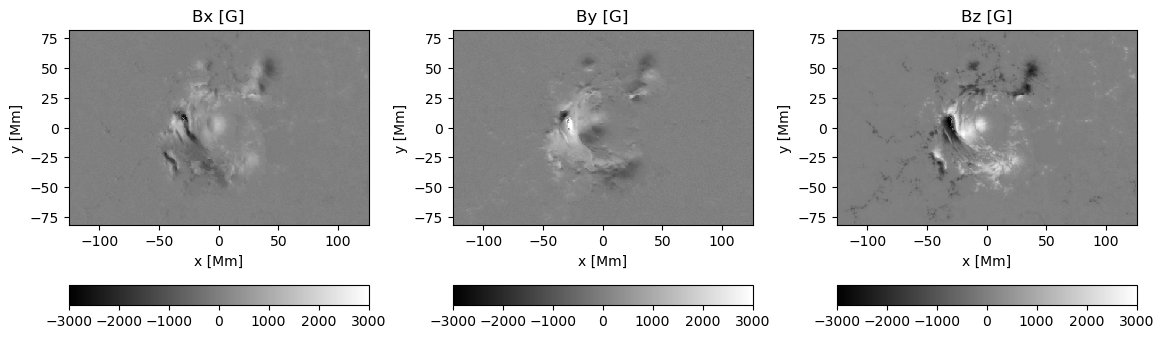

In [7]:
data.plot()

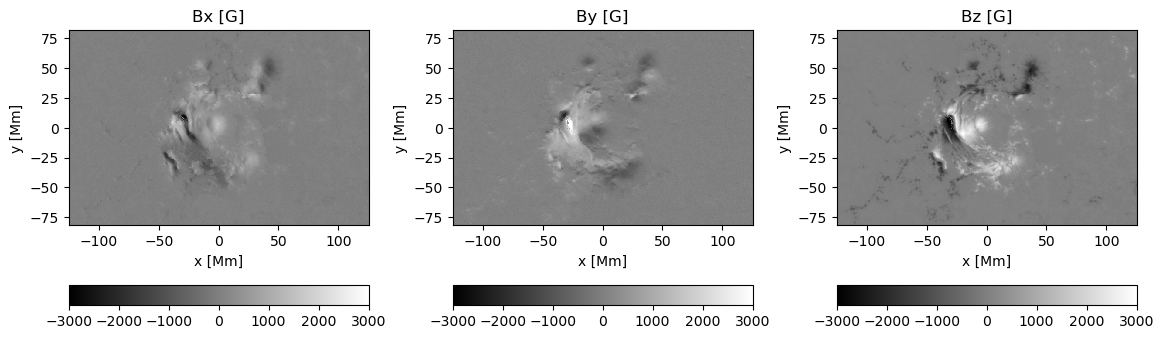

In [8]:
obs_data.plot()

In [9]:
nx, ny, nz = data.bz_pot.shape
data.bz_pot.shape

(513, 257, 257)

In [10]:
b_n = data.bz_pot[..., 0]
b_n.shape

(513, 257)

In [2]:
import os
import time
import jax
import jax.numpy as jnp
import optax
import matplotlib.pyplot as plt
from tqdm import trange
from jax import jvp, value_and_grad
from flax import linen as nn
from typing import Sequence
from functools import partial

In [155]:
class SPINN(nn.Module):
    features: Sequence[int]

    @nn.compact
    def __call__(self, x, y, z):
        inputs, outputs = [x, y, z], []
        init = nn.initializers.glorot_normal()
        for X in inputs:
            for fs in self.features[:-1]:
                X = nn.Dense(fs, kernel_init=init)(X)
                X = nn.activation.tanh(X)
            X = nn.Dense(self.features[-1], kernel_init=init)(X)
            outputs += [jnp.transpose(X, (1, 0))]
        xy = jnp.einsum('fx, fy->fxy', outputs[0], outputs[1])
        return jnp.einsum('fxy, fz->fxyz', xy, outputs[-1])
    
@partial(jax.jit, static_argnums=(0,))
def update_model(optim, gradient, params, state):
    updates, state = optim.update(gradient, state)
    params = optax.apply_updates(params, updates)
    return params, state

def train_data_generator(nc, key, data):
    keys = jax.random.split(key, 3)

    xc = jax.random.uniform(keys[0], (nc, 1), minval=0., maxval=512)
    yc = jax.random.uniform(keys[1], (nc, 1), minval=0., maxval=256)
    zc = jax.random.uniform(keys[2], (nc, 1), minval=0., maxval=256)
    # xc_m, yc_m, zc_m = jnp.meshgrid(xc.ravel(), yc.ravel(), zc.ravel(), indexing='ij')
    # uc = jnp.zeros(xc_m.shape)

    # xb_p = jax.random.randint(keys[3], (512, 1), minval=0, maxval=512)
    # yb_p = jax.random.randint(keys[4], (256, 1), minval=0, maxval=256)
    # zb_p = jax.random.randint(keys[5], (256, 1), minval=0, maxval=256)
    xb_p = jnp.arange(0, 513).reshape(-1, 1)
    yb_p = jnp.arange(0, 257).reshape(-1, 1)
    zb_p = jnp.arange(0, 257).reshape(-1, 1)

    xb = [jnp.array([[0]]),
          jnp.array([[512]]),
          xb_p,
          xb_p,
          xb_p,
          xb_p,]
    yb = [yb_p,
          yb_p,
          jnp.array([[0]]),
          jnp.array([[256]]),
          yb_p,
          yb_p,]
    zb = [zb_p,
          zb_p,
          zb_p,
          zb_p,
          jnp.array([[0]]),
          jnp.array([[256]]),]
    
    b = np.stack([np.array(data.bx), np.array(data.by), np.array(data.bz)], axis=0)

    ub = [b[:, 0, :, :]]
    ub += [b[:, 512, :, :]]
    ub += [b[:, :, 0, :]]
    ub += [b[:, :, 256, :]]
    ub += [b[:, :, :, 0]]
    ub += [b[:, :, :, 256]]
    
    return xc, yc, zc, xb, yb, zb, ub


def loss_nlfff(apply_fn, *train_data):
    def pde_loss(params, xc, yc, zc):
        v = jnp.ones(xc.shape)
        bx, bx_x = jvp(lambda x: apply_fn(params, x, yc, zc)[..., 0], (xc,), (v,))
        bx, bx_y = jvp(lambda y: apply_fn(params, xc, y, zc)[..., 0], (yc,), (v,))
        bx, bx_z = jvp(lambda z: apply_fn(params, xc, yc, z)[..., 0], (zc,), (v,))

        by, by_x = jvp(lambda x: apply_fn(params, x, yc, zc)[..., 1], (xc,), (v,))
        by, by_y = jvp(lambda y: apply_fn(params, xc, y, zc)[..., 1], (yc,), (v,))
        by, by_z = jvp(lambda z: apply_fn(params, xc, yc, z)[..., 1], (zc,), (v,))

        bz, bz_x = jvp(lambda x: apply_fn(params, x, yc, zc)[..., 2], (xc,), (v,))
        bz, bz_y = jvp(lambda y: apply_fn(params, xc, y, zc)[..., 2], (yc,), (v,))
        bz, bz_z = jvp(lambda z: apply_fn(params, xc, yc, z)[..., 2], (zc,), (v,))

        x_comp = ((bx_z - bz_x)*bz - (by_x-bx_y)*by)**2
        y_comp = ((by_x - bx_y)*bx - (bz_y-by_z)*bz)**2
        z_comp = ((bz_y - by_z)*by - (bx_z-bz_x)*bx)**2

        div = (bx_x + by_y + bz_z)**2
        return jnp.mean(x_comp + y_comp + z_comp + div)
    
    def boundary_loss(params, xb, yb, zb, ub):
        loss = 0.
        for i in range(6):
            loss += (1/6.)*jnp.mean((apply_fn(params, xb[i], yb[i], zb[i]).squeeze() - ub[i])**2)
        return loss

    xc, yc, zc, xb, yb, zb, ub = train_data 

    fn = lambda params: pde_loss(params, xc, yc, zc) + \
                        boundary_loss(params, xb, yb, zb, ub)
    return fn

def test_data_generator(nc_test):
    xt = jnp.linspace(0., 512., nc_test).reshape(-1, 1)
    yt = jnp.linspace(0., 256., nc_test).reshape(-1, 1)
    zt = jnp.linspace(0., 256., nc_test).reshape(-1, 1)
    return xt, yt, zt


In [60]:
NC = 64
NB = 64
NC_TEST = 100
SEED = 444
LR = 1e-3
EPOCHS = 50000
N_LAYERS = 4
FEATURES = 64
LOG_ITER = 25000

In [157]:
def main(NC, NB, NC_TEST, SEED, LR, EPOCHS, N_LAYERS, FEATURES, LOG_ITER):
    key = jax.random.PRNGKey(SEED)

    key, subkey = jax.random.split(key, 2)
    feat_sizes = list(FEATURES for _ in range(N_LAYERS)) + [3]
    model = SPINN(feat_sizes)
    params = model.init(subkey, jnp.ones((NC, 1)), jnp.ones((NC, 1)), jnp.ones((NC, 1)))

    optim = optax.adam(LR)
    state = optim.init(params)

    key, subkey = jax.random.split(key, 2)
    train_data = train_data_generator(NC, subkey, data)
    # xt, yt, zt = test_data_generator(NC_TEST)

    apply_fn = jax.jit(model.apply)
    loss_fn = loss_nlfff(apply_fn, *train_data)
    @jax.jit
    def train_one_step(params, state):
        # compute loss and gradient
        loss, gradient = value_and_grad(loss_fn)(params)
        # update state
        params, state = update_model(optim, gradient, params, state)
        return loss, params, state

    start = time.time()
    for e in trange(1, EPOCHS+1):
        # single run
        loss, params, state = train_one_step(params, state)
        # if e % 100 == 0 and e < 1000:
            # u = apply_fn(params, xt, yt)
            # plot_u(xt_m, yt_m, u, e)
        if e % LOG_ITER == 0:
            print(f'Epoch: {e}/{EPOCHS} --> loss: {loss:.8f}')
    end = time.time()
    print(f'Runtime: {((end-start)/EPOCHS*1000):.2f} ms/iter.')

In [158]:
main(NC, NB, NC_TEST, SEED, LR, EPOCHS, N_LAYERS, FEATURES, LOG_ITER)

  0%|          | 0/50000 [00:00<?, ?it/s]

(3, 1, 257, 257)


  1%|          | 377/50000 [00:22<18:41, 44.23it/s]  

In [147]:
key = jax.random.PRNGKey(SEED)

key, subkey = jax.random.split(key, 2)
feat_sizes = tuple(FEATURES for _ in range(N_LAYERS))
model = SPINN(feat_sizes)
params = model.init(subkey, jnp.ones((NC, 1)), jnp.ones((NC, 1)), jnp.ones((NC, 1)))

optim = optax.adam(LR)
state = optim.init(params)

key, subkey = jax.random.split(key, 2)
train_data = train_data_generator(NC, subkey, data)
# xt, yt, zt = test_data_generator(NC_TEST)

apply_fn = jax.jit(model.apply)
loss_fn = loss_nlfff(apply_fn, *train_data)

(64, 1) (64, 1) (64, 1) (1, 1) (257, 1) (257, 1) (3, 257, 257)


In [150]:
xb_p = jnp.array([[0]])
yb_p = jnp.arange(0, 257).reshape(-1, 1)
zb_p = jnp.arange(0, 257).reshape(-1, 1)
approx = apply_fn(params, xb_p, yb_p, zb_p)
approx.shape

(4, 1, 257, 257)

In [146]:
loss_fn(params)

(4, 1, 257, 257)


TypeError: sub got incompatible shapes for broadcasting: (4, 257, 257), (3, 257, 257).

In [118]:
loss, gradient = value_and_grad(loss_fn)(params)

TypeError: sub got incompatible shapes for broadcasting: (4, 257, 257), (3, 257, 257).

In [35]:
data_b = np.stack([np.array(data.bx), np.array(data.by), np.array(data.bz)], axis=0)
np.array_equal(data_b[0, ...], data.bx)

True

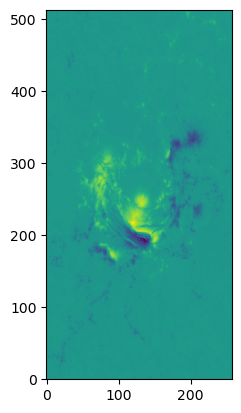

In [42]:
plt.imshow(data_b[2, :, :, 0], origin='lower')

In [37]:
data_b[:, 0, :, :].shape

(3, 257, 257)

In [26]:
data.bx.shape

(513, 257, 257)

In [24]:
data.bz[..., 0].shape

(513, 257)

In [13]:
NC = 64
NI = 64
NB = 64
NC_TEST = 100
SEED = 444
LR = 1e-3
EPOCHS = 50000
N_LAYERS = 4
FEATURES = 64
LOG_ITER = 25000

In [14]:
key = jax.random.PRNGKey(SEED)
key, subkey = jax.random.split(key, 2)
feat_sizes = list(FEATURES for _ in range(N_LAYERS)) + [3]
model = SPINN(feat_sizes)
apply_fn = jax.jit(model.apply)
params = model.init(subkey, jnp.ones((NC, 1)), jnp.ones((NC, 1)), jnp.ones((NC, 1)))
optim = optax.adam(LR)
state = optim.init(params)

In [62]:
xc = jax.random.randint(subkey, (64, 1), minval=0, maxval=512)
yc = jax.random.randint(subkey, (64, 1), minval=0, maxval=512)
zc = jax.random.randint(subkey, (64, 1), minval=0, maxval=512)

In [78]:
b = apply_fn(params, jnp.array([[0]]), yc, zc)
b.squeeze()[:, 0, 0]

Array([-0.,  0., -0.], dtype=float32)

In [66]:
data_b[:, 0, :, :].shape

(3, 257, 257)

In [80]:
b.squeeze()[:, 0, 0] - data_b[:, 0, yc[0], zc[0]].ravel()

Array([-0.3601203 ,  0.03252466, -4.417468  ], dtype=float32)

In [79]:
data_b[:, 0, yc[0], zc[0]].ravel()

array([ 0.3601203 , -0.03252466,  4.41746807])

In [ ]:
xt = jnp.linspace(0, 512, 512).reshape(-1, 1)
yt = jnp.linspace(0, 256, 256).reshape(-1, 1)
zt = jnp.linspace(0, 256, 256).reshape(-1, 1)
xt = jax.lax.stop_gradient(xt)
yt = jax.lax.stop_gradient(yt)
zt = jax.lax.stop_gradient(zt)
# xt_m, yt_m, zt_m = jnp.meshgrid(xt.ravel(), yt.ravel(), yt.ravel(), indexing='ij')



In [50]:
data_b[:, 0, :, :].shape

(3, 257, 257)

In [48]:
b = apply_fn(params, jnp.array([[0.]]), yt, zt)
b[0, ...].shape

(1, 256, 256)

In [16]:
b = apply_fn(params, xt, yt, zt)
b.shape

(3, 100, 100, 100)

In [17]:
bx = b[0, ...]
bx.shape

(100, 100, 100)

In [151]:
xtt = jnp.arange(0, 513).reshape(-1, 1)
ytt = jnp.arange(0, 257).reshape(-1, 1)
ztt = jnp.arange(0, 257).reshape(-1, 1)
b = apply_fn(params, jnp.array([[0]]), ytt, ztt)

In [152]:
data_b[:, 0, :, :].shape

(3, 257, 257)

In [153]:
data_b[:, 0, :, :]

array([[[ 1.55900002e+01,  3.50013504e+01,  3.63774910e+01, ...,
          3.60985190e-01,  3.55274379e-01,  3.49653751e-01],
        [ 4.94300003e+01,  3.13111439e+01,  3.46097336e+01, ...,
          3.61419648e-01,  3.55696917e-01,  3.50064665e-01],
        [ 2.64400005e+01,  3.34577980e+01,  3.37273483e+01, ...,
          3.61855119e-01,  3.56120408e-01,  3.50476503e-01],
        ...,
        [ 3.82599983e+01,  4.08993721e+01,  3.81778221e+01, ...,
          3.60120296e-01,  3.54433268e-01,  3.48835796e-01],
        [-3.40600014e+01,  4.12420578e+01,  3.79927101e+01, ...,
          3.60551983e-01,  3.54853064e-01,  3.49244058e-01],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[-3.77700005e+01,  3.72808838e+01,  3.72053375e+01, ...,
         -3.54031213e-02, -3.48284245e-02, -3.42597552e-02],
        [-4.10299988e+01,  3.42654495e+01,  3.45526772e+01, ...,
         -3.68108861e-02, -3.62070464e

In [154]:
jnp.mean((b.squeeze() - data_b[:, 0, :, :])**2)

TypeError: sub got incompatible shapes for broadcasting: (4, 257, 257), (3, 257, 257).

In [18]:
v = jnp.ones(xt.shape)

bx1, bx_x = jvp(lambda x: apply_fn(params, x, yt, zt)[0, ...], (xt,), (v,))
bx2, bx_y = jvp(lambda y: apply_fn(params, xt, y, zt)[0, ...], (yt,), (v,))
bx3, bx_z = jvp(lambda z: apply_fn(params, xt, yt, z)[0, ...], (zt,), (v,))

bool(np.array_equal(bx1, bx2)*np.array_equal(bx2, bx3))

True

In [19]:
bx, bx_x = jvp(lambda x: apply_fn(params, x, yt, zt)[..., 0], (xt,), (v,))
bx, bx_y = jvp(lambda y: apply_fn(params, xt, y, zt)[..., 0], (yt,), (v,))
bx, bx_z = jvp(lambda z: apply_fn(params, xt, yt, z)[..., 0], (zt,), (v,))

by, by_x = jvp(lambda x: apply_fn(params, x, yt, zt)[..., 1], (xt,), (v,))
by, by_y = jvp(lambda y: apply_fn(params, xt, y, zt)[..., 1], (yt,), (v,))
by, by_z = jvp(lambda z: apply_fn(params, xt, yt, z)[..., 1], (zt,), (v,))

bz, bz_x = jvp(lambda x: apply_fn(params, x, yt, zt)[..., 2], (xt,), (v,))
bz, bz_y = jvp(lambda y: apply_fn(params, xt, y, zt)[..., 2], (yt,), (v,))
bz, bz_z = jvp(lambda z: apply_fn(params, xt, yt, z)[..., 2], (zt,), (v,))

In [6]:
key = jax.random.PRNGKey(222)
keys = jax.random.split(key, 2)
nc = 64
xc = jax.random.uniform(keys[0], (nc, 1), minval=0., maxval=9)
yc = jax.random.uniform(keys[1], (nc, 1), minval=0., maxval=3)
xc_m, yc_m = jnp.meshgrid(xc.ravel(), yc.ravel(), indexing='ij')
uc = jnp.zeros(xc_m.shape)

xb = [jnp.array([[0.]]),
        jnp.array([[9]]),
        xc,
        xc]
yb = [yc,
        yc,
        jnp.array([[0.]]),
        jnp.array([[3]])]
xb_m0, yb_m0 = jnp.meshgrid(xb[0].ravel(), yb[0].ravel(), indexing='ij')
xb_m1, yb_m1 = jnp.meshgrid(xb[1].ravel(), yb[1].ravel(), indexing='ij')

In [11]:
a = jnp.array([[1, 2, 3], [4, 5, 6]])

In [12]:
a

Array([[1, 2, 3],
       [4, 5, 6]], dtype=int32)

In [ ]:
k = jnp.array([[1, 2], [4, 5, 6]])

In [30]:
xc = jax.random.randint(keys[0], (3, 1), minval=0., maxval=3)
yc = jax.random.randint(keys[1], (3, 1), minval=0., maxval=2)

In [31]:
xc_m, yc_m = jnp.meshgrid(xc.ravel(), yc.ravel(), indexing='ij')

In [32]:
xc_m

Array([[2, 2, 2],
       [0, 0, 0],
       [0, 0, 0]], dtype=int32)

In [33]:
xc

Array([[2],
       [0],
       [0]], dtype=int32)

In [34]:
yc

Array([[1],
       [1],
       [0]], dtype=int32)

In [53]:
test = jnp.stack([xc.ravel(), yc.ravel()])
test

Array([[2, 0, 0],
       [1, 1, 0]], dtype=int32)

In [55]:
a[xc.ravel(), yc.ravel()]

Array([5, 2, 1], dtype=int32)

In [130]:
class SPINN(nn.Module):
    features: Sequence[int]

    @nn.compact
    def __call__(self, x, y, z):
        inputs, outputs = [x, y, z], []
        init = nn.initializers.glorot_normal()
        for X in inputs:
            for fs in self.features[:-1]:
                K = nn.Dense(fs, kernel_init=init)(X)
                K = nn.activation.tanh(K)
            K = nn.Dense(self.features[-1], kernel_init=init)(K)
            for fs in self.features[:-1]:
                L = nn.Dense(fs, kernel_init=init)(X)
                L = nn.activation.tanh(L)
            L = nn.Dense(self.features[-1], kernel_init=init)(L)
            for fs in self.features[:-1]:
                M = nn.Dense(fs, kernel_init=init)(X)
                M = nn.activation.tanh(M)
            M = nn.Dense(self.features[-1], kernel_init=init)(M)
            outputs += [[jnp.transpose(L, (1, 0)), jnp.transpose(K, (1, 0)), jnp.transpose(M, (1, 0))]]
        xy = jnp.einsum('fx, fy->fxy', outputs[0][0], outputs[1][0])
        bx = jnp.einsum('fxy, fz->xyz', xy, outputs[2][0])

        xy = jnp.einsum('fx, fy->fxy', outputs[0][1], outputs[1][1])
        by = jnp.einsum('fxy, fz->xyz', xy, outputs[2][1])

        xy = jnp.einsum('fx, fy->fxy', outputs[0][2], outputs[1][2])
        bz = jnp.einsum('fxy, fz->xyz', xy, outputs[2][2])
        return jnp.stack([bx, by, bz], axis=-1)

In [131]:
nc = 128
keys = jax.random.split(key, 3)
xc = jax.random.uniform(keys[0], (nc, 1), minval=0., maxval=512)
yc = jax.random.uniform(keys[1], (nc, 1), minval=0., maxval=256)
zc = jax.random.uniform(keys[2], (nc, 1), minval=0., maxval=256)
key, subkey = jax.random.split(key, 2)
features = list(FEATURES for _ in range(N_LAYERS))
model = SPINN(features)
params = model.init(subkey, jnp.ones((nc, 1)), jnp.ones((nc, 1)), jnp.ones((nc, 1)))
apply_fn = jax.jit(model.apply)

In [132]:
b = apply_fn(params, xc, yc, zc)
b.shape

(128, 128, 128, 3)